The data is already be cleaned and processed last week. I create a new csv file and storge them. So, I will read that file instead.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress   
import datetime
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from random import choice
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Sud uqsetion: What is the probability that the total steps for a week is lower than recommended. As doctors generally consider fewer than 10000 steps per day to be sedentary.

In [3]:
from google.colab import drive
drive.mount('/content/drive') #Link to the Google drive and read the data set later.

Mounted at /content/drive


In [204]:
weeksteps = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Weeks_and_steps_08.csv", sep = ",")

Let x be the target variable and y be the characteristic variable. The target variable is prepared for prediction. The characteristic variable is parpered for check the accurate.

In [205]:
x = weeksteps.drop(columns='Sedentary')
y = weeksteps['Sedentary']

The function train_test_split is for seperating test data set and training data set. x_train and y_train for training, x_test and y_test for testing.

In [206]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.6) # I selected 60% of data for testing. Temporarily set random sampling.

Take x_train and y_train variables into logistic regression function.

In [207]:
model = LogisticRegression()
model = model.fit(x_train, y_train)
model

LogisticRegression()

Get the prediced sedentary.

In [209]:
y_prd = model.predict(x_test)
y_prd[:20] # Get the prediction of sedentary.

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [210]:
a = pd.DataFrame()
a['Predicted'] = list(y_prd)
a['Actual'] = list(y_test)

a.head()

,Predicted,Actual
0,1,1
1,1,0
2,1,1
3,1,1
4,1,1


Calculate accuracy of the predicted sedentary value for checking.

In [211]:
acc = model.score(x_test, y_test)
acc

0.5909090909090909

The accuracy is 59.09%.

Predict accuracy.

In [212]:
y_prd_acc = model.predict_proba(x_test)
acc_table = pd.DataFrame(y_prd_acc, columns = ['Probability of not sedentary','Probability of sedentary'])
acc_table

,Probability of not sedentary,Probability of sedentary
0,0.125285,0.874715
1,0.136981,0.863019
2,0.145675,0.854325
3,0.399202,0.600798
4,0.127881,0.872119
5,0.155650,0.844350
6,0.543082,0.456918
7,0.350135,0.649865
8,0.328279,0.671721
9,0.200506,0.799494


Let's viaualise the data.

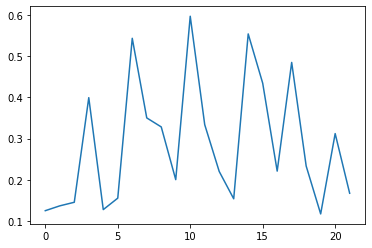

In [213]:
y = acc_table['Probability of not sedentary']
x = [  ]
for n in range(0,len(acc_table)):
  x.append(n)
  n+=1
plt.plot(x,y)

The trend of the probability of not sedentary follows the changing of time and seasons. The data shows a increasing trend and decreasing then. The step count is relatively low at January and increasing until Aprial and June. The weather gets cool at that moment. The participant 8 may more willing to walk more in cool days. That makes the participant less sedentary.

In [185]:
weeksteps05 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/weeks_and_steps_5.csv",sep=',')

In [186]:
weeksteps05['Week'] = weeksteps05['Week'].astype('int') # Change 
weeksteps05['sedentary'] = weeksteps05['sedentary'].astype('int')

In [187]:
x05 = weeksteps05.drop(columns='sedentary')
y05 = weeksteps05['sedentary']

In [198]:
x05_train,x05_test,y05_train,y05_test = train_test_split(x05, y05, test_size = 0.5) # I selected 30% of data for testing. Temporarily do not set random sampling.

In [199]:
model05 = LogisticRegression()
model05 = model05.fit(x05_train, y05_train)

In [200]:
Y_prd05 = model05.predict(x05_test)
Y_prd05[:20] # Get the prediction of sedentary.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [201]:
A = pd.DataFrame()
A['Predicted'] = list(Y_prd05)
A['Actual'] = list(y05_test)
A.head()

,Predicted,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [202]:
acc05 = model.score(x05_test, y05_test)
acc05

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Count
Feature names seen at fit time, yet now missing:
- Steps (count)

  warnings.warn(message, FutureWarning)


0.8235294117647058

The accuracy is 82.6% which is similar to the last result with data set 08.


In [203]:
Y_prd_acc05 = model05.predict_proba(x05_test)
Acc_table05 = pd.DataFrame(Y_prd_acc05, columns = ['Probability of not sedentary','Probability of sedentary'])
Acc_table05

,Probability of not sedentary,Probability of sedentary
0,0.742000,0.258000
1,0.798513,0.201487
2,0.745925,0.254075
3,0.834023,0.165977
4,0.812005,0.187995
5,0.546775,0.453225
6,0.940494,0.059506
7,0.666884,0.333116
8,0.669943,0.330057
9,0.873910,0.126090


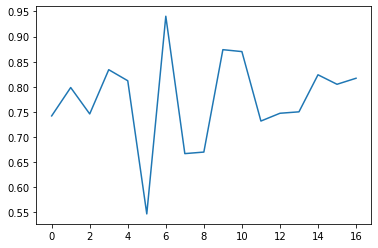

In [205]:
y = Acc_table05['Probability of not sedentary']
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
plt.plot(x,y)

Let's check this model by the third data set. Participant 01. Due to the steps data in participant 01 are much larger than other data sets, so I change the sedentary limit into 12000 steps each day.

In [206]:
p1_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/weeks_and_steps_1.csv',sep=',')
p1_data.head()

,week,Count,sedentary
0,1,127289,0
1,2,137307,0
2,3,134580,0
3,4,121104,0
4,5,96668,0


In [207]:
x01 = p1_data.drop(columns='sedentary')
y01 = p1_data['sedentary']
x01_train,x01_test,y01_train,y01_test = train_test_split(x01, y01, test_size = 0.5) # I selected 30% of data for testing. Temporarily do not set random sampling.
model01 = LogisticRegression()
model01 = model01.fit(x01_train, y01_train)
model01
Y_prd01 = model01.predict(x01_test)
Y_prd01[:20] # Get the prediction of sedentary.


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [208]:
Pre_01 = pd.DataFrame()
Pre_01['Predicted'] = list(Y_prd01)
Pre_01['Actual'] = list(y01_test)
Pre_01

,Predicted,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [209]:
acc01 = model01.score(x01_test, y01_test)
acc01

0.85

The accuracy is 85% which is similar to the last result with data set 08.

In [210]:
Y_prd_acc01 = model01.predict_proba(x01_test)
Acc_table01 = pd.DataFrame(Y_prd_acc01, columns = ['Probability of not sedentary','Probability of sedentary'])
Acc_table01

,Probability of not sedentary,Probability of sedentary
0,0.880625,0.119375
1,0.688380,0.311620
2,0.924150,0.075850
3,0.600258,0.399742
4,0.860741,0.139259
5,0.911639,0.088361
6,0.957877,0.042123
7,0.653051,0.346949
8,0.700008,0.299992
9,0.858452,0.141548


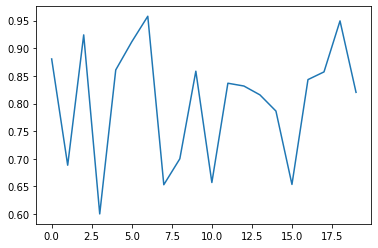

In [211]:
y = Acc_table01['Probability of not sedentary']
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
plt.plot(x,y)